In [1]:
import pandas
import matplotlib.pyplot as pyplot

# Read in the data and display the first 5 columns
dataframe = pandas.read_csv('./calendar.csv')

# Set the date column to be a pandas datetime column
dataframe['date'] = pandas.to_datetime(dataframe['date'])
dataframe.head()

dataframe.loc[dataframe['date'].dt.month == 2].loc[dataframe['available'] == 't']

,listing_id,date,available,price
28,241032,2016-02-01,t,$85.00
29,241032,2016-02-02,t,$85.00
30,241032,2016-02-03,t,$85.00
31,241032,2016-02-04,t,$85.00
32,241032,2016-02-05,t,$85.00
...,...,...,...,...
1392892,9604740,2016-02-25,t,$99.00
1392893,9604740,2016-02-26,t,$99.00
1392894,9604740,2016-02-27,t,$99.00
1392895,9604740,2016-02-28,t,$99.00


The second question was figuring out what the most expensive time of year was to visit Seattle

In [2]:
# Check if there are any null values in the available or date columns
nullPrices = dataframe['price'].isnull().sum()

notNullPrices = dataframe['price'].value_counts().sum()

nullPrices, notNullPrices

(459028, 934542)

There are 459,028 rows without a price, and 934,542 rows with a price. Checking to see if all the rows without a price are rows that are not available

In [3]:
nullPrices = dataframe.loc[dataframe['available'] == 'f']['price'].isnull().sum()

nullPrices

459028

The rows with unavailable listings do not list a price. This means it won't be possible to determine a price delta between the busiest and not the busiest times of year. However, it can be determined what the most expensive time of year is.

In [4]:
priceByDate = dataframe.groupby(['date', 'price'], as_index=False).size()

priceByDate['price_as_decimal'] = priceByDate['price'].str.replace('[\$,]', '', regex=True).astype(float)

priceByDate = priceByDate.loc[priceByDate['date'].dt.month == 2]

priceByDate['price_as_decimal'] = priceByDate['price'].str.replace('[\$,]', '', regex=True).astype(float)
priceByDate['month'] = priceByDate['date'].dt.month

priceByDate

,date,price,size,price_as_decimal,month
6800,2016-02-01,"$1,000.00",1,1000.0,2
6801,2016-02-01,$100.00,92,100.0,2
6802,2016-02-01,$101.00,5,101.0,2
6803,2016-02-01,$102.00,6,102.0,2
6804,2016-02-01,$103.00,9,103.0,2
...,...,...,...,...,...
14314,2016-02-29,$96.00,6,96.0,2
14315,2016-02-29,$97.00,13,97.0,2
14316,2016-02-29,$98.00,14,98.0,2
14317,2016-02-29,$99.00,73,99.0,2


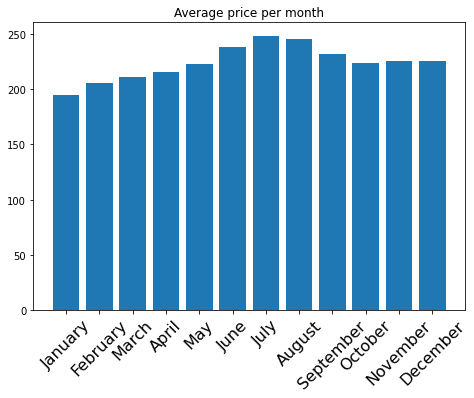

In [6]:
# Group by date, and price
priceByDate = dataframe.groupby(['date', 'price'], as_index=False).size()

# Only concerned with 2016 data
priceByDate = priceByDate.loc[priceByDate['date'].dt.year == 2016]

# Add the columns that will be grouped and computed to get the mean price per month
priceByDate['price_as_decimal'] = priceByDate['price'].str.replace('[\$,]', '', regex=True).astype(float)
priceByDate['month'] = priceByDate['date'].dt.month

# Setup the plotData
plotData = pandas.DataFrame({'month': priceByDate['month'], 'price': priceByDate['price_as_decimal']})

# Group by the month and get the price mean, rounded to the penny
plotData = plotData.groupby('month', as_index=False).mean().round(2)

# Set the month column to the month name for the Bar chart
plotData['month'] = pandas.to_datetime(plotData['month'], format='%m').dt.month_name()

# Plot a bar graph detailing availability by month
graph = pyplot.figure().add_axes([0, 0, 1, 1])
pyplot.setp(graph.get_xticklabels(), fontsize=16, rotation='45')
pyplot.title("Average price per month")

graph.bar(plotData['month'], plotData['price'])

pyplot.show()

The most expensive time of the year to vist Seattle using AirBNB is during the summer with July being the most expensive month overall